<a href="https://colab.research.google.com/github/flash-berry/computer_vision_2024/blob/main/CV_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.applications.efficientnet import preprocess_input
#from tensorflow.keras.applications.resnet_v2 import preprocess_input
#from tensorflow.keras.applications.inception_v3 import preprocess_input
#from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
#from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
#from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = os.path.join(os.path.dirname('/content/drive/MyDrive/dataset.zip'), 'dataset')

In [ ]:
base_dir = os.path.join(os.path.dirname('/content/drive/MyDrive/video.zip'), 'video')

In [ ]:
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input  # Нормализация
)

# Загружаем данные из директории
test_data = datagen.flow_from_directory(
    base_dir,  # Путь к директории с изображениями
    batch_size=32,
    class_mode='sparse',
    target_size=(299, 299)  # Размеры изображений
)

Found 277 images belonging to 5 classes.


In [ ]:
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

my_dict = {
    0: 'Медведь',
    1: 'Кабан',
    2: 'Лось',
    3: 'Помеха',
    4: 'Волк'
}

In [ ]:
# Функция для отображения изображений
def plot_images(images, labels, n_images=5):
    plt.figure(figsize=(20, 10))
    for i in range(n_images):
        plt.subplot(1, n_images, i + 1)
        plt.imshow(images[i].astype("uint8"))  # Приводим к uint8 для отображения
        plt.title(my_dict[int(labels[i])])
        plt.axis('off')
    plt.show()

In [ ]:
#def plotImages(images_arr):
#  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
#  axes = axes.flatten()
#  for img, ax in zip(images_arr, axes):
#    ax.imshow(img)
#  plt.tight_layout()
#  plt.show()

#sample_training_images, label_training_images = next(train_data)
#plotImages(sample_training_images[:5])

In [ ]:
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input  # Нормализация
)

# Загружаем данные из директории
test_data = datagen.flow_from_directory(
    test_dir,  # Путь к директории с изображениями
    batch_size=32,
    class_mode='sparse',
    target_size=(299, 299)  # Размеры изображений
)

Found 50 images belonging to 5 classes.


In [ ]:
# Загружаем данные из директории
train_data = datagen.flow_from_directory(
    train_dir,  # Путь к директории с изображениями
    batch_size=32,
    class_mode='sparse',  # Или 'categorical', в зависимости от задачи
    target_size=(299, 299)  # Размеры изображений
)

Found 200 images belonging to 5 classes.


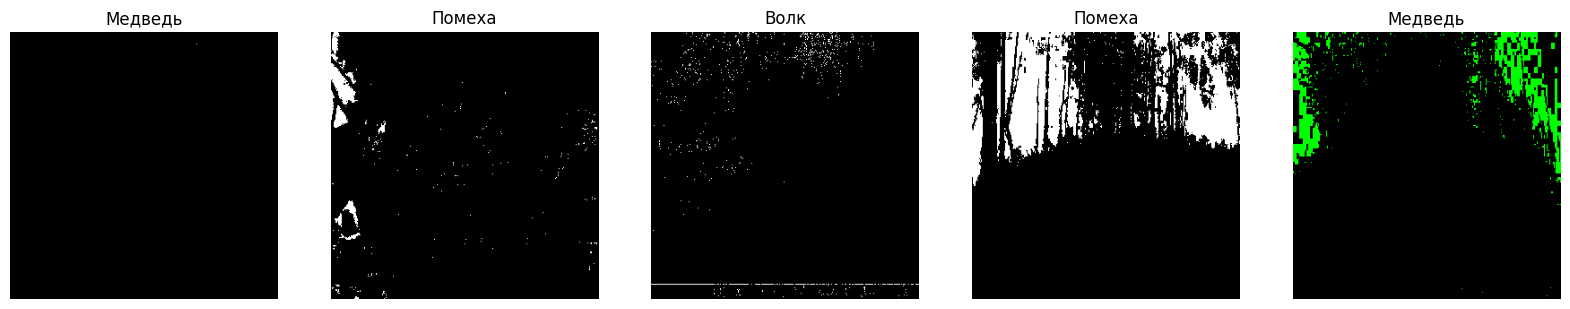

In [ ]:
for batch_images, label_images in train_data:
    plot_images(batch_images, label_images)  # Отображаем изображения из первой партии
    break  # Останавливаемся после одной партии

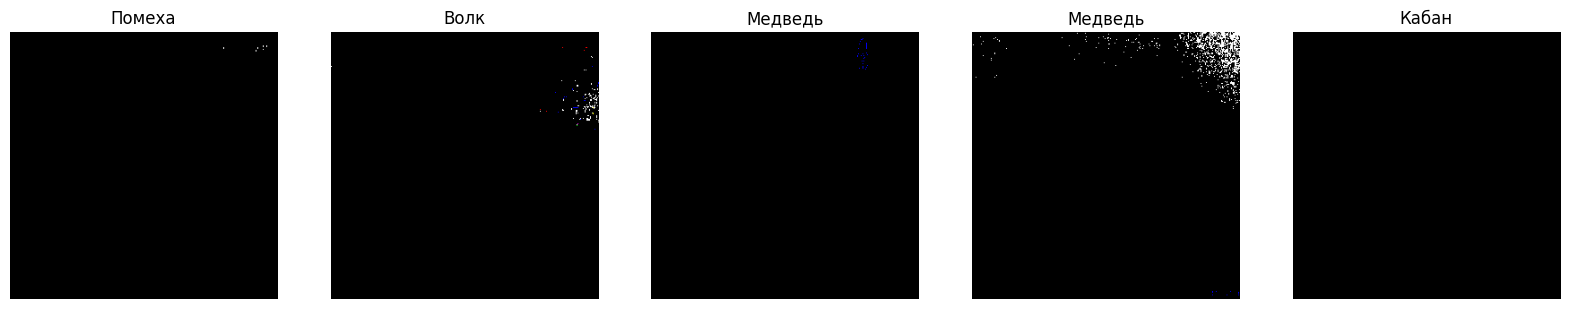

In [ ]:
for batch_images, label_images in test_data:
    plot_images(batch_images, label_images)  # Отображаем изображения из первой партии
    break  # Останавливаемся после одной партии

In [ ]:
# Создаем экземпляр ImageDataGenerator для аугментации
aug_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Нормализация
    rotation_range=15,              # Случайный поворот до 30 градусов
    width_shift_range=0.2,          # Горизонтальный сдвиг до 20% ширины
    height_shift_range=0.2,         # Вертикальный сдвиг до 20% высоты
    shear_range=0.2,                # Сдвиг изображения
    zoom_range=0.2,                 # Случайное масштабирование
    horizontal_flip=True,           # Случайное горизонтальное отражение
    fill_mode="nearest"             # Заполнение пикселей за пределами границ
)

# Генерируем аугментированные изображения
aug_train_data = aug_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    class_mode="sparse",
    target_size=(299, 299)
)

Found 200 images belonging to 5 classes.


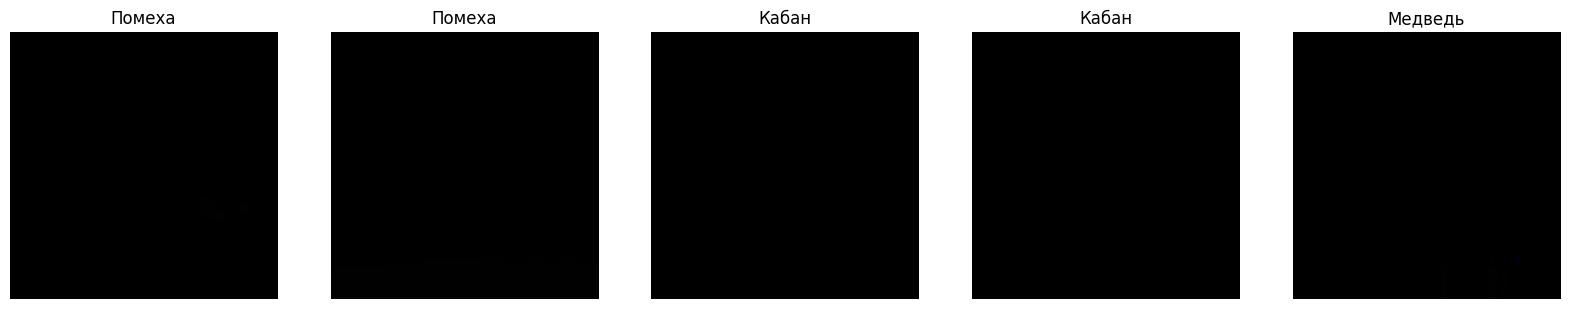

In [ ]:
for batch_images, label_images in aug_train_data:
    plot_images(batch_images, label_images)  # Отображаем изображения из первой партии
    break  # Останавливаемся после одной партии

**Объединяем исходные изображения и аугментированные**

In [ ]:
for i in range(len(train_data)):
  if i == 0:
    # Генерация данных из оригинального генератора
    x_original, y_original = next(train_data)

    # Генерация данных из аугментированного генератора
    x_augmented, y_augmented = next(aug_train_data)

    # Объединяем изображения и метки
    x_combined = np.concatenate((x_original, x_augmented), axis=0)
    y_combined = np.concatenate((y_original, y_augmented), axis=0)
  else:
    # Генерация данных из оригинального генератора
    x_original, y_original = next(train_data)

    # Генерация данных из аугментированного генератора
    x_augmented, y_augmented = next(aug_train_data)

    x_time = np.concatenate((x_original, x_augmented), axis=0)
    y_time = np.concatenate((y_original, y_augmented), axis=0)

    # Объединяем изображения и метки
    x_combined = np.concatenate((x_combined, x_time), axis=0)
    y_combined = np.concatenate((y_combined, y_time), axis=0)

In [ ]:
y_combined

array([1., 2., 4., 3., 1., 3., 0., 2., 4., 0., 1., 2., 1., 2., 0., 1., 2.,
       4., 4., 3., 4., 2., 3., 1., 2., 4., 4., 4., 4., 3., 2., 0., 3., 1.,
       2., 4., 4., 1., 0., 3., 4., 1., 3., 3., 1., 2., 3., 1., 4., 4., 0.,
       0., 4., 0., 1., 2., 4., 0., 2., 3., 2., 2., 3., 2., 2., 0., 2., 2.,
       0., 1., 0., 3., 2., 2., 3., 4., 3., 3., 2., 4., 4., 3., 0., 0., 1.,
       1., 0., 1., 2., 4., 2., 1., 3., 1., 0., 1., 0., 1., 3., 2., 0., 0.,
       0., 4., 4., 4., 1., 0., 0., 0., 4., 1., 1., 2., 0., 4., 4., 2., 4.,
       0., 1., 1., 0., 1., 2., 2., 1., 1., 2., 3., 3., 3., 3., 4., 3., 1.,
       0., 4., 3., 4., 2., 4., 2., 0., 2., 1., 3., 3., 2., 4., 0., 4., 0.,
       2., 0., 0., 0., 1., 2., 1., 1., 2., 4., 2., 3., 0., 4., 0., 4., 1.,
       3., 1., 1., 4., 2., 0., 1., 0., 3., 4., 0., 4., 3., 4., 0., 4., 4.,
       0., 3., 4., 3., 1., 2., 4., 4., 1., 2., 0., 2., 4., 4., 2., 3., 4.,
       0., 1., 4., 3., 1., 4., 3., 1., 2., 0., 3., 0., 4., 1., 4., 0., 3.,
       2., 1., 0., 3., 2.

In [ ]:
len(y_combined)

400

In [ ]:
for i in range(len(train_data)):
    # Генерация данных из аугментированного генератора
    x_augmented, y_augmented = next(aug_train_data)

    # Объединяем изображения и метки
    x_combined = np.concatenate((x_combined, x_augmented), axis=0)
    y_combined = np.concatenate((y_combined, y_augmented), axis=0)

In [ ]:
len(y_combined)

1200

In [ ]:
# Создаем пустые массивы для объединения данных
x_test = np.empty((0,) + test_data.image_shape, dtype=np.float32)  # Указываем форму изображения
y_test = np.empty((0,), dtype=np.float32)  # Для меток

# Итерируемся по данным генератора
for i in range(len(test_data)):
    # Генерация данных из генератора
    x_original, y_original = next(test_data)

    # Объединяем изображения и метки
    x_test = np.concatenate((x_test, x_original), axis=0)
    y_test = np.concatenate((y_test, y_original), axis=0)

In [ ]:
y_test

array([1., 3., 4., 3., 1., 2., 3., 3., 4., 3., 0., 2., 3., 4., 0., 4., 1.,
       2., 3., 4., 2., 3., 4., 3., 1., 2., 2., 3., 4., 3., 3., 1., 4., 1.,
       0., 3., 2., 2., 4., 3., 0., 1., 4., 3., 4., 1., 2., 4., 4., 4., 1.,
       3., 3., 4., 4., 0., 1., 4., 4., 2., 4., 4., 4., 3., 3., 3., 4., 1.,
       3., 0., 4., 3., 2., 4., 4., 1., 4., 3., 2., 3., 0., 1., 2., 4., 0.,
       3., 4., 1., 1., 4., 4., 3., 3., 2., 0., 4., 4., 2., 4., 3., 4., 1.,
       4., 1., 1., 3., 3., 0., 4., 1., 1., 1., 1., 3., 2., 0., 3., 3., 3.,
       0., 4., 4., 2., 3., 3., 0., 1., 3., 4., 2., 1., 1., 1., 3., 3., 1.,
       3., 2., 2., 0., 1., 1., 4., 2., 4., 1., 2., 0., 3., 2., 3., 4., 2.,
       4., 4., 4., 3., 4., 3., 1., 1., 3., 4., 4., 0., 3., 2., 1., 1., 3.,
       3., 1., 4., 2., 1., 4., 4., 0., 3., 0., 1., 4., 0., 4., 4., 0., 3.,
       4., 3., 4., 0., 2., 4., 0., 0., 0., 1., 0., 0., 0., 1., 1., 4., 3.,
       4., 0., 3., 4., 4., 1., 3., 3., 2., 0., 3., 3., 1., 4., 1., 2., 2.,
       1., 4., 4., 1., 4.

In [ ]:
len(y_test)

277

In [ ]:
from tensorflow.keras.applications import EfficientNetV2M
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

# Создаем callback для ранней остановки
early_stopping = EarlyStopping(
    monitor='val_loss',       # Метрика для мониторинга (валидационная потеря)
    patience=2,               # Количество эпох без улучшений перед остановкой
    restore_best_weights=True # Восстановить лучшие веса модели после остановки
)

# Загружаем предобученную модель
base_model = EfficientNetV2M(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

base_model.trainable = False

inputs = tf.keras.Input(shape=(299, 299, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
outputs = Dense(5, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

# Создаем callback для ранней остановки
early_stopping = EarlyStopping(
    monitor='val_loss',       # Метрика для мониторинга (валидационная потеря)
    patience=2,               # Количество эпох без улучшений перед остановкой
    restore_best_weights=True # Восстановить лучшие веса модели после остановки
)

# Загружаем предобученную модель
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

base_model.trainable = False

inputs = tf.keras.Input(shape=(299, 299, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
outputs = Dense(5, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

# Создаем callback для ранней остановки
early_stopping = EarlyStopping(
    monitor='val_loss',       # Метрика для мониторинга (валидационная потеря)
    patience=2,               # Количество эпох без улучшений перед остановкой
    restore_best_weights=True # Восстановить лучшие веса модели после остановки
)

# Загружаем предобученную модель
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

base_model.trainable = False

inputs = tf.keras.Input(shape=(299, 299, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
outputs = Dense(5, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

# Создаем callback для ранней остановки
early_stopping = EarlyStopping(
    monitor='val_loss',       # Метрика для мониторинга (валидационная потеря)
    patience=2,               # Количество эпох без улучшений перед остановкой
    restore_best_weights=True # Восстановить лучшие веса модели после остановки
)

# Загружаем предобученную модель
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
outputs = Dense(5, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

# Создаем callback для ранней остановки
early_stopping = EarlyStopping(
    monitor='val_loss',       # Метрика для мониторинга (валидационная потеря)
    patience=2,               # Количество эпох без улучшений перед остановкой
    restore_best_weights=True # Восстановить лучшие веса модели после остановки
)

# Загружаем предобученную модель
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

base_model.trainable = False

inputs = tf.keras.Input(shape=(299, 299, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
outputs = Dense(5, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

# Создаем callback для ранней остановки
early_stopping = EarlyStopping(
    monitor='val_loss',       # Метрика для мониторинга (валидационная потеря)
    patience=2,               # Количество эпох без улучшений перед остановкой
    restore_best_weights=True # Восстановить лучшие веса модели после остановки
)

# Загружаем предобученную модель
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
outputs = Dense(5, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

# Создаем callback для ранней остановки
early_stopping = EarlyStopping(
    monitor='val_loss',       # Метрика для мониторинга (валидационная потеря)
    patience=2,               # Количество эпох без улучшений перед остановкой
    restore_best_weights=True # Восстановить лучшие веса модели после остановки
)

# Загружаем предобученную модель
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

base_model.trainable = False

inputs = tf.keras.Input(shape=(299, 299, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
outputs = Dense(5, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-m (Functional)        │ (None, 10, 10, 1280)        │      53,150,388 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           6,405 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,156,793 (202.78 MB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 53,150,388 (202.75 MB)

In [ ]:
history = model.fit(
    x_combined, y_combined,
    batch_size = 32,
    validation_data = (x_test, y_test),
    epochs = 20,
    callbacks=[early_stopping] # Передаем callback в fit()
)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 916s 23s/step - accuracy: 0.4350 - loss: 1.4035 - val_accuracy: 0.6600 - val_loss: 1.0161
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 901s 22s/step - accuracy: 0.8006 - loss: 0.8193 - val_accuracy: 0.6800 - val_loss: 0.8003
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 866s 23s/step - accuracy: 0.8175 - loss: 0.6506 - val_accuracy: 0.7400 - val_loss: 0.7121
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 866s 23s/step - accuracy: 0.8562 - loss: 0.5372 - val_accuracy: 0.7200 - val_loss: 0.6661
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 852s 22s/step - accuracy: 0.8354 - loss: 0.5308 - val_accuracy: 0.7600 - val_loss: 0.6430
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 853s 22s/step - accuracy: 0.8499 - loss: 0.4652 - val_accuracy: 0.7600 - val_loss: 0.6213
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 846s 22s/step - accuracy: 0.8672 - loss: 0.4134 - val_accuracy: 0.7800 - val_loss: 0.6133
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 881s 23s/step - accuracy: 0.8843 - loss: 0.3973 - val_accuracy: 0.

In [ ]:
model.save('model.h5')

In [ ]:
base_model.trainable = True
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-m (Functional)        │ (None, 10, 10, 1280)        │      53,150,388 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           6,405 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,169,605 (202.83 MB)

 Trainable params: 52,864,761 (201.66 MB)

 Non-trainable params: 292,032 (1.11 MB)

 Optimizer params: 12,812 (50.05 KB)

In [ ]:
history = model.fit(
    x_combined, y_combined,
    batch_size = 32,
    validation_data = (x_test, y_test),
    epochs = 20,
    callbacks=[early_stopping] # Передаем callback в fit()
)

Epoch 1/20


In [ ]:
model2 = tf.keras.models.load_model('/content/1k5_EfficientNetV2M.h5')

9/9 ━━━━━━━━━━━━━━━━━━━━ 229s 23s/step


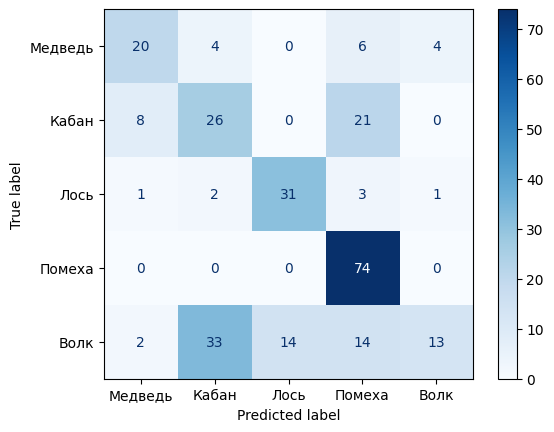

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_labels = ["Медведь", "Кабан", "Лось", "Помеха", "Волк"]

# Получаем предсказания модели на тестовых данных
y_pred = model2.predict(x_test)  # x_test — тестовые данные
y_pred_classes = np.argmax(y_pred, axis=1)  # Выбираем класс с максимальной вероятностью

# Вычисляем confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Визуализация confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print("Test dataset evaluation")
model2.evaluate(x_test, y_test, batch_size=32)

Test dataset evaluation
9/9 ━━━━━━━━━━━━━━━━━━━━ 202s 21s/step - accuracy: 0.5894 - loss: 1.2079


[1.1852046251296997, 0.5920577645301819]

In [ ]:
model_loss = {
    "EfficientNetB0": 0.6800000071525574,
    "EfficientNetB7": 0.5953700542449951,
    "EfficientNetV2M": 0.6081107258796692,
    "InceptionV3": 0.6508933901786804,
    "MobileNetV2": 1.081782579421997,
    "ResNet50V2": 0.73252272605896,
    "Xception": 0.6672167778015137
}

In [ ]:
sorted_model_loss = dict(sorted(model_loss.items(), key=lambda item: item[1], reverse=True))

In [ ]:
sorted_model_loss

{'MobileNetV2': 1.081782579421997,
 'ResNet50V2': 0.73252272605896,
 'EfficientNetB0': 0.6800000071525574,
 'Xception': 0.6672167778015137,
 'InceptionV3': 0.6508933901786804,
 'EfficientNetV2M': 0.6081107258796692,
 'EfficientNetB7': 0.5953700542449951}

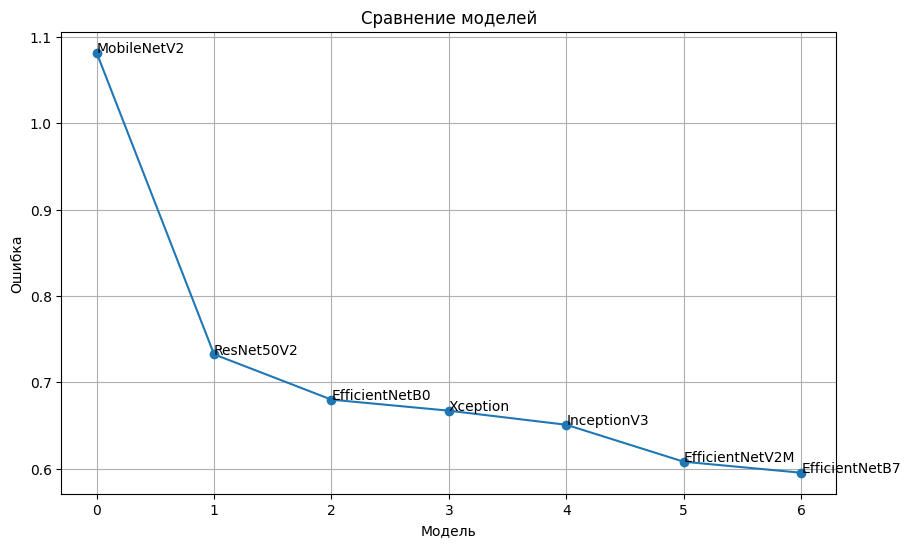

In [ ]:
x = list(range(len(sorted_model_loss)))  # Создаем список индексов
y = [sorted_model_loss[key] for key in sorted_model_loss]  # Используем список для доступа к значениям

plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
plt.plot(x, y, marker='o')  # Строим график

# Добавляем подписи к точкам
for i, key in enumerate(sorted_model_loss):
    plt.annotate(key, (i, sorted_model_loss[key]))

plt.title('Сравнение моделей')
plt.xlabel('Модель')
plt.ylabel('Ошибка')
plt.grid()  # Добавляем сетку
plt.show()  # Отображаем график

**Создаём baseline модель**

In [ ]:

model = tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(244, 244, 3)),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.MaxPooling2D(2, 2),
 tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
 tf.keras.layers.BatchNormalization(),
 tf.keras.layers.MaxPooling2D(2, 2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.compile(
 optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 244, 244, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 244, 244, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 122, 122, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 122, 122, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 238144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │      30,482,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,502,981 (116.36 MB)

 Trainable params: 30,502,789 (116.36 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
history = model.fit(
    x_combined, y_combined,
    batch_size = 32,
    validation_data = (x_test, y_test),
    epochs = 20
)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 80s 6s/step - accuracy: 0.2081 - loss: 59.3778 - val_accuracy: 0.1600 - val_loss: 4.7093
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - accuracy: 0.3952 - loss: 8.9721 - val_accuracy: 0.1400 - val_loss: 5.3620
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.3765 - loss: 2.1923 - val_accuracy: 0.1400 - val_loss: 10.3860
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - accuracy: 0.3801 - loss: 1.3938 - val_accuracy: 0.2000 - val_loss: 19.9895
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 83s 6s/step - accuracy: 0.4056 - loss: 1.2640 - val_accuracy: 0.2200 - val_loss: 31.8823
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.4085 - loss: 1.3877 - val_accuracy: 0.2200 - val_loss: 43.0709
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.4057 - loss: 1.3359 - val_accuracy: 0.2000 - val_loss: 55.5012
Epoch 8/20
 3/13 ━━━━━━━━━━━━━━━━━━━━ 54s 5s/step - accuracy: 0.4271 - loss: 1.4251 

KeyboardInterrupt: 

**Накидал варианты как можно преобразовать дневное изображение в ночное**

In [ ]:
dark_img = cv2.convertScaleAbs(img_rgb, alpha=0.5, beta=0)  # alpha уменьшает яркость

# Добавление синего оттенка
blue_tint = np.zeros_like(dark_img)
blue_tint[:, :, 0] = 50  # Увеличиваем синий канал
night_img = cv2.addWeighted(dark_img, 0.8, blue_tint, 0.2, 0)

# Сохранение результата
cv2.imwrite('night_image.jpg', night_img)

True

In [ ]:
# Загрузка изображения
gray_img = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Преобразование в "ночное видение"
night_vision = cv2.applyColorMap(gray_img, cv2.COLORMAP_SUMMER)

# Добавление шума
noise = np.random.randint(0, 50, night_vision.shape, dtype='uint8')
night_vision = cv2.add(night_vision, noise)

cv2.imwrite('night_vision.jpg', night_vision)

True

In [ ]:
alpha = 0.3  # Коэффициент яркости (меньше 1 для затемнения)
beta = 0     # Смещение яркости
dark_img = cv2.convertScaleAbs(img_rgb, alpha=alpha, beta=beta)

# Добавление синего оттенка (имитация лунного света)
blue_tint = np.zeros_like(dark_img)
blue_tint[:, :, 0] = 50  # Усиливаем синий канал
night_img = cv2.addWeighted(dark_img, 0.8, blue_tint, 0.2, 0)

# Усиление теней
hsv_img = cv2.cvtColor(night_img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_img)
v = cv2.equalizeHist(v)  # Усиление контрастности по яркости
night_img = cv2.merge((h, s, v))
night_img = cv2.cvtColor(night_img, cv2.COLOR_HSV2BGR)

# Сохранение результата
cv2.imwrite('night_image_cv.jpg', night_img)

True

In [ ]:
alpha = 0.3  # Коэффициент яркости (меньше 1 для затемнения)
beta = 0     # Смещение яркости
dark_img = cv2.convertScaleAbs(img_rgb, alpha=alpha, beta=beta)

# Добавление синего оттенка (имитация лунного света)
blue_tint = np.zeros_like(dark_img)
blue_tint[:, :, 0] = 50  # Усиливаем синий канал
night_img = cv2.addWeighted(dark_img, 0.8, blue_tint, 0.2, 0)

# Усиление теней
hsv_img = cv2.cvtColor(night_img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_img)
v = cv2.equalizeHist(v)  # Усиление контрастности по яркости
night_img = cv2.merge((h, s, v))
night_img = cv2.cvtColor(night_img, cv2.COLOR_HSV2BGR)

noise = np.random.randint(0, 50, night_img.shape, dtype='uint8')
night_img = cv2.add(night_img, noise)

night_img = cv2.GaussianBlur(night_img, (5, 5), 0)

# Сохранение результата
cv2.imwrite('night_image_cv3.jpg', night_img)

True

In [ ]:
# думаю лучше всего создаёт эффект ночи

alpha = 0.3  # Коэффициент яркости (меньше 1 для затемнения)
beta = 0     # Смещение яркости
dark_img = cv2.convertScaleAbs(img_rgb, alpha=alpha, beta=beta)

# Добавление синего оттенка (имитация лунного света)
blue_tint = np.zeros_like(dark_img)
blue_tint[:, :, 0] = 50  # Усиливаем синий канал
night_img = cv2.addWeighted(dark_img, 0.8, blue_tint, 0.2, 0)

# Усиление теней
hsv_img = cv2.cvtColor(night_img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_img)
v = cv2.equalizeHist(v)  # Усиление контрастности по яркости
night_img = cv2.merge((h, s, v))
night_img = cv2.cvtColor(night_img, cv2.COLOR_HSV2BGR)

noise = np.random.randint(0, 50, night_img.shape, dtype='uint8')
night_img = cv2.add(night_img, noise)

# Сохранение результата
cv2.imwrite('night_image_cv2.jpg', night_img)

True

In [ ]:
image = cv2.imread('/content/50.jpg')

# Преобразуем изображение в градации серого
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Сохраняем или отображаем изображение
cv2.imwrite('gray_image2.jpg', gray_image)  # Сохраняем изображение

True